# ADC PROJECT 
## Social Signed Network - ***rfa-Wiki***
### Voting for Admins

In [72]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import os

import spacy
from spacy import displacy

import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [113]:
df = pd.read_csv("./Data/wiki_RfA_2010_2013.csv")
df.dtypes

SRC    object
TGT    object
VOT     int64
RES     int64
YEA     int64
DAT    object
TXT    object
dtype: object

In [90]:
df

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''''' per noms. BDD is a strong contributor w...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''''', with great pleasure. I work with BDD a..."
...,...,...,...,...,...,...,...
30247,Smithers7,ZooPro,-1,-1,2010,2010-02-22 16:06:00,'''[[User:Smithers7/RfA|]]''' - ZooPro mention...
30248,SilkTork,ZooPro,-1,-1,2010,2010-02-22 17:18:00,"'''''' because of the concerns already raised,..."
30249,GlassCobra,ZooPro,-1,-1,2010,2010-02-22 18:14:00,'''''' per Tanthalas and SilkTork.
30250,Atama,ZooPro,-1,-1,2010,2010-02-22 18:17:00,"'''''' - Per Polargeo, and per [http://en.wiki..."


In [76]:

# Assuming df is the DataFrame that you've already filtered and processed
# Create a signed graph
def create_signed_graph(df):
    """
    Create a MultiDiGraph from a DataFrame with edges labeled by interaction type.

    Parameters:
        df (pd.DataFrame): DataFrame containing columns for edges and attributes.

    Returns:
        G (nx.MultiDiGraph): The created graph.
    """
    G = nx.MultiDiGraph()  # Use MultiDiGraph to allow multiple edges between nodes

    # Iterate through the rows of the DataFrame to add edges and nodes
    for _, row in df.iterrows():
        src = row['SRC']  # Source node
        tgt = row['TGT']  # Target node
        vot = row['VOT']  # Label: -1, 1
        txt = row['TXT']  # Additional textual information
        res = row['RES']  # Admin status: 1 for admin, 0 for nonAdmin
        dat = row['DAT']  # Date or timestamp attribute

        # Add nodes if they don't already exist
        if src not in G:
            G.add_node(src)
        if tgt not in G:
            G.add_node(tgt)

        # Determine admin status for the edge
        admin_status = "admin" if res == 1 else "nonAdmin"

        # Add edge with attributes, storing `VOT` as a label, not a weight
        edge_attrs = {
            'label': vot,   # Interaction type (-1, 0, 1)
            'txt': txt,     # Additional text data
            'admin': admin_status,  # Whether the interaction involves an admin
            'DAT': dat      # Timestamp or date
        }
        G.add_edge(src, tgt, **edge_attrs)  # Add the edge with all attributes
    
    return G

# Create the signed graph
G = create_signed_graph(df)

G

### Basic Characteristics

#### Number of Nodes

In [4]:
G.number_of_nodes()

2934

#### Number of Edges

In [5]:
G.number_of_edges()

30252

In [77]:
first_edge = next(iter(G.edges(data=True)))
type(first_edge[2]["label"])

int

### Avreage Degree

In [7]:
# Calculate total degree for all nodes
total_degree = sum(dict(G.degree()).values())

# Get the number of nodes in the graph
num_nodes = G.number_of_nodes()

# Calculate the average degree
average_degree = total_degree / num_nodes if num_nodes > 0 else 0

print(f"Average Degree: {average_degree:.2f}")

# Calculate average in-degree
average_in_degree = sum(dict(G.in_degree()).values()) / num_nodes if num_nodes > 0 else 0
print(f"Average In-Degree: {average_in_degree:.2f}")

# Calculate average out-degree
average_out_degree = sum(dict(G.out_degree()).values()) / num_nodes if num_nodes > 0 else 0
print(f"Average Out-Degree: {average_out_degree:.2f}")


Average Degree: 20.62
Average In-Degree: 10.31
Average Out-Degree: 10.31


### Max Degree - TOP 20

In [8]:

# Assuming G is your directed graph

# Get the in-degree and out-degree of all nodes
in_degree_dict = dict(G.in_degree())
out_degree_dict = dict(G.out_degree())

# Combine in-degree and out-degree for each node
degree_info = {
    node: {"in_degree": in_degree_dict.get(node, 0), "out_degree": out_degree_dict.get(node, 0)}
    for node in G.nodes()
}

# Sort nodes by in-degree and out-degree
top_20_in_degree = sorted(degree_info.items(), key=lambda x: x[1]["in_degree"], reverse=True)[:20]
top_20_out_degree = sorted(degree_info.items(), key=lambda x: x[1]["out_degree"], reverse=True)[:20]

# Print the top 20 nodes with in-degree and out-degree
print("Top 20 nodes by in-degree:")
for node, degrees in top_20_in_degree:
    print(f"User: {node}, In-degree: {degrees['in_degree']}")

print("\nTop 20 nodes by out-degree:")
for node, degrees in top_20_out_degree:
    print(f"User: {node}, Out-degree: {degrees['out_degree']}")


Top 20 nodes by in-degree:
User: HJ Mitchell, In-degree: 314
User: Connormah, In-degree: 296
User: Ironholds, In-degree: 275
User: Lord Roem, In-degree: 263
User: The Thing That Should Not Be, In-degree: 240
User: Everyking, In-degree: 233
User: SarekOfVulcan, In-degree: 227
User: SarahStierch, In-degree: 216
User: DeltaQuad, In-degree: 214
User: GiantSnowman, In-degree: 212
User: Drmies, In-degree: 205
User: Σ, In-degree: 200
User: Richwales, In-degree: 189
User: Dabomb87, In-degree: 188
User: 28bytes, In-degree: 183
User: Elen of the Roads, In-degree: 181
User: Soap, In-degree: 180
User: My76Strat, In-degree: 179
User: MZMcBride, In-degree: 179
User: Ling.Nut, In-degree: 176

Top 20 nodes by out-degree:
User: Boing! said Zebedee, Out-degree: 246
User: Fastily, Out-degree: 242
User: Ktr101, Out-degree: 231
User: Fetchcomms, Out-degree: 221
User: Mkativerata, Out-degree: 185
User: Axl, Out-degree: 180
User: Minimac, Out-degree: 178
User: RP459, Out-degree: 174
User: Kudpung, Out-degree

### Clustering

Average Clustering Coefficient: 0.12484940859574861


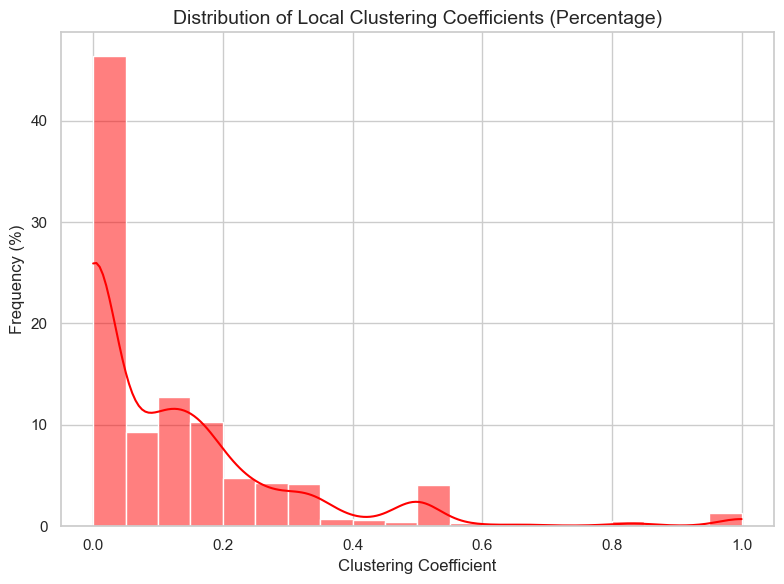

In [9]:
# Convert MultiDiGraph to DiGraph (collapse multiple edges)
G_simple = nx.DiGraph()
for u, v, data in G.edges(data=True):
    if not G_simple.has_edge(u, v):
        G_simple.add_edge(u, v, **data)

# Compute clustering coefficients
local_clustering = nx.clustering(G_simple)  # Local clustering coefficient
average_clustering = nx.average_clustering(G_simple)  # Average clustering coefficient

# Print the results
print(f"Average Clustering Coefficient: {average_clustering}")

# Create the 'plots' directory if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

# Set up the plot figure
plt.figure(figsize=(8, 6))

# Plot the distribution of local clustering coefficients (percentages)
plt.subplot(1, 1, 1)  # Only one plot, so 1 row, 1 column, 1st position
sns.histplot(list(local_clustering.values()), kde=True, color='red', bins=20, stat='percent')
plt.title("Distribution of Local Clustering Coefficients (Percentage)", fontsize=14)
plt.xlabel("Clustering Coefficient", fontsize=12)
plt.ylabel("Frequency (%)", fontsize=12)

# Adjust the layout
plt.tight_layout()

# Save the plot to the 'plots' folder
plt.savefig('plots/clustering_coefficient_distribution_percentage.png')

# Show the plot
plt.show()

### Small World Properties

Calculating **Shortest Path**


In [10]:
import networkx as nx

# Assuming G is your directed graph (MultiDiGraph or DiGraph)
# First, find the largest strongly connected component (SCC)
strongly_connected_components = list(nx.strongly_connected_components(G))
largest_scc = max(strongly_connected_components, key=len)

# Create a subgraph from the largest SCC
G_scc = G.subgraph(largest_scc)


avg_shortest_path_length = nx.average_shortest_path_length(G_scc)
print(f"Average Shortest Path Length: {avg_shortest_path_length}")



Average Shortest Path Length: 2.4228483202154583


A **Strongly Connected Component (SCC)**: of a directed graph is a maximal subgraph in which every node is reachable from every other node following the direction of the edges.
Characteristics of SCCs:

- In a strongly connected component, for any two nodes uu and vv, there exists:
    - A directed path from uu to vv.
    - A directed path from vv to uu.
- SCCs partition the nodes of the graph; every node belongs to exactly one SCC.


Useful for understanding fully reciprocal relationships in directed networks, such as social or communication networks.

In [11]:
# Find strongly connected components
strongly_connected_components = list(nx.strongly_connected_components(G))

# Count the number of components
num_components = len(strongly_connected_components)

print(f"Number of strongly connected components: {num_components}")

Number of strongly connected components: 2641


A **Weakly Connected Component (WCCs)** of a directed graph is a maximal subgraph where all nodes are connected if you ignore the direction of the edges.
Characteristics of WCCs:

- In a weakly connected component, there exists an undirected path between any two nodes (disregarding edge direction).
- WCCs are larger than or equal to SCCs because ignoring direction may merge multiple SCCs into one WCC.

Helpful when you care about overall connectivity, regardless of direction, such as transportation or infrastructure networks.

In [12]:
# Find weakly connected components
weakly_connected_components = list(nx.weakly_connected_components(G))

# Count the number of weakly connected components
num_weak_components = len(weakly_connected_components)

print(f"Number of weakly connected components: {num_weak_components}")


Number of weakly connected components: 1


| **Property**                 | **SCC (Strongly Connected Component)** | **WCC (Weakly Connected Component)** |
|------------------------------|-----------------------------------------|---------------------------------------|
| **Definition**               | Nodes are mutually reachable via directed paths. | Nodes are connected when edge directions are ignored. |
| **Path Requirement**         | Direction matters.                     | Direction is ignored.                |
| **Applicability**            | Stronger condition, specific to directed graphs. | A weaker condition, closer to undirected connectivity. |
| **Size Relationship**        | SCCs are smaller or equal to WCCs.     | WCCs are larger or equal to SCCs.    |


**Cannot Calculate Diameter of the Whole Graph** due to not being strongly connected (Diameter fails)


In [13]:
# Assuming G is your directed graph (DiGraph or MultiDiGraph)
# Find the largest strongly connected component
strongly_connected_components = list(nx.strongly_connected_components(G))
largest_scc = max(strongly_connected_components, key=len)

# Create a subgraph from the largest SCC
G_scc = G.subgraph(largest_scc)

# Calculate the diameter if the subgraph is strongly connected
if nx.is_strongly_connected(G_scc):
    graph_diameter = nx.diameter(G_scc)
    print(f"Diameter of the largest strongly connected component: {graph_diameter}")
else:
    print("The graph is not strongly connected, and diameter cannot be calculated directly.")

Diameter of the largest strongly connected component: 6


### Voting Type Distribution

In [14]:
# Initialize counters
count_1 = 0
count_neg1 = 0
total_edges = G.number_of_edges()  # Get the total number of edges

# Loop through the edges of the graph
for u, v, data in G.edges(data=True):
    vot = data.get('label', 0)  # Assuming 'label' represents the VOT attribute
    
    # Count the VOT values
    if vot == 1:
        count_1 += 1
    elif vot == -1:
        count_neg1 += 1

# Calculate percentages
percentage_1 = (count_1 / total_edges) * 100 if total_edges > 0 else 0
percentage_neg1 = (count_neg1 / total_edges) * 100 if total_edges > 0 else 0

# Print the counts and percentages
print(f"Edges with VOT = 1: {count_1} ({percentage_1:.2f}%)")
print(f"Edges with VOT = -1: {count_neg1} ({percentage_neg1:.2f}%)")


Edges with VOT = 1: 23035 (76.14%)
Edges with VOT = -1: 7217 (23.86%)


In [15]:
# Initialize dictionaries to count the occurrences of VOT values for each SRC
src_1_count = {}
src_neg1_count = {}
total_votes = 0

# Iterate through the edges of the graph
for u, v, data in G.edges(data=True):
    vot = data.get('label', 0)  # Assuming 'label' represents the VOT attribute
    
    # Count the occurrences based on VOT values
    if vot == 1:  # For VOT value of 1
        if u in src_1_count:
            src_1_count[u] += 1
        else:
            src_1_count[u] = 1
    elif vot == -1:  # For VOT value of -1
        if u in src_neg1_count:
            src_neg1_count[u] += 1
        else:
            src_neg1_count[u] = 1

    # Increment total vote count
    total_votes += 1

# Sort the dictionaries by the count in descending order and get the top nodes
top_1_src = sorted(src_1_count.items(), key=lambda x: x[1], reverse=True)[:10]
top_neg1_src = sorted(src_neg1_count.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top nodes with the most VOT as SRC for 1, and -1
print("\nTop 10 nodes with the most 1 VOT as SRC:")
for src, count in top_1_src:
    percentage = (count / total_votes) * 100
    print(f"{src}: {count} votes ({percentage:.2f}%)")

print("\nTop 10 nodes with the most -1 VOT as SRC:")
for src, count in top_neg1_src:
    percentage = (count / total_votes) * 100
    print(f"{src}: {count} votes ({percentage:.2f}%)")



Top 10 nodes with the most 1 VOT as SRC:
Ktr101: 213 votes (0.70%)
Boing! said Zebedee: 179 votes (0.59%)
Newyorkbrad: 146 votes (0.48%)
RP459: 146 votes (0.48%)
Fetchcomms: 137 votes (0.45%)
Tryptofish: 135 votes (0.45%)
Wizardman: 130 votes (0.43%)
Ret.Prof: 130 votes (0.43%)
Secret: 129 votes (0.43%)
Airplaneman: 129 votes (0.43%)

Top 10 nodes with the most -1 VOT as SRC:
Fastily: 123 votes (0.41%)
Townlake: 85 votes (0.28%)
Fetchcomms: 84 votes (0.28%)
Salvio giuliano: 74 votes (0.24%)
Cirt: 74 votes (0.24%)
Malleus Fatuorum: 73 votes (0.24%)
Boing! said Zebedee: 67 votes (0.22%)
Kudpung: 64 votes (0.21%)
Colonel Warden: 60 votes (0.20%)
Minimac: 59 votes (0.20%)


In [16]:
# Initialize dictionaries to store the count of votes per node
src_1_count = {}
src_neg1_count = {}
src_total_count = {}

# Iterate through the edges of the graph
for u, v, data in G.edges(data=True):
    vot = data.get('label', 0)  # Assuming 'label' represents the VOT attribute
    
    # Track the total number of votes for each node (SRC)
    if u in src_total_count:
        src_total_count[u] += 1
    else:
        src_total_count[u] = 1
    
    # Count the occurrences based on VOT values
    if vot == 1:
        src_1_count[u] = src_1_count.get(u, 0) + 1
    elif vot == -1:
        src_neg1_count[u] = src_neg1_count.get(u, 0) + 1

# Sort the nodes by total votes and select the top 100
top_100_voters = sorted(src_total_count.items(), key=lambda x: x[1], reverse=True)[:100]

# Now calculate the proportion of each type of vote for the top 100 voters
vote_proportions = []

for node, total_votes in top_100_voters:
    prop_1 = src_1_count.get(node, 0) / total_votes
    prop_neg1 = src_neg1_count.get(node, 0) / total_votes
    
    vote_proportions.append({
        'node': node,
        'total_votes': total_votes,
        '1': prop_1,
        '-1': prop_neg1
    })

# Rank top 10 nodes by the proportion of '1' votes and '-1' votes
ranked_1 = sorted(vote_proportions, key=lambda x: (x['1'], x['total_votes']), reverse=True)[:10]
ranked_neg1 = sorted(vote_proportions, key=lambda x: (x['-1'], x['total_votes']), reverse=True)[:10]

# Output the results
print("\nTop 10 voters by proportion of '1' votes:")
for voter in ranked_1:
    print(f"Node {voter['node']}: {voter['total_votes']} total votes, {voter['1']*100:.2f}% were '1'")

print("\nTop 10 voters by proportion of '-1' votes:")
for voter in ranked_neg1:
    print(f"Node {voter['node']}: {voter['total_votes']} total votes, {voter['-1']*100:.2f}% were '-1'")



Top 10 voters by proportion of '1' votes:
Node Newyorkbrad: 146 total votes, 100.00% were '1'
Node Rogerd: 86 total votes, 100.00% were '1'
Node FeydHuxtable: 100 total votes, 99.00% were '1'
Node Casliber: 99 total votes, 98.99% were '1'
Node BuickCenturyDriver: 85 total votes, 98.82% were '1'
Node Ceranthor: 115 total votes, 97.39% were '1'
Node Orphan Wiki: 73 total votes, 97.26% were '1'
Node The Blade of the Northern Lights: 71 total votes, 95.77% were '1'
Node Pharaoh of the Wizards: 106 total votes, 95.28% were '1'
Node King of Hearts: 95 total votes, 94.74% were '1'

Top 10 voters by proportion of '-1' votes:
Node Cirt: 94 total votes, 78.72% were '-1'
Node Townlake: 111 total votes, 76.58% were '-1'
Node Malleus Fatuorum: 98 total votes, 74.49% were '-1'
Node Kraftlos: 74 total votes, 63.51% were '-1'
Node Colonel Warden: 95 total votes, 63.16% were '-1'
Node Salvio giuliano: 126 total votes, 58.73% were '-1'
Node Fastily: 242 total votes, 50.83% were '-1'
Node Jclemens: 74 t

In [17]:
# Filter rows where the target ('TGT') is "Neelix"
votes_on_neelix = df[df['TGT'].str.contains("Neelix", case=False, na=False)]

# Count the types of votes based on the 'VOT' column
vote_counts = votes_on_neelix['VOT'].value_counts()

# Display the result
print("Vote types for Neelix:")
print(vote_counts)


Vote types for Neelix:
VOT
 1    69
-1    14
Name: count, dtype: int64


### Finding Hubs - Centralities
Most "important" nodes, for some definition of important. The most basic measure of centrality is the *degree*, or number of links attached to a node.

### Degree Centrality

The degree centrality of a node is the number of edges connected to it. Hubs will have a high degree compared to other nodes.

In [18]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality in descending order
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 hubs by degree centrality
print("Top 10 hubs by degree centrality:")
for node, centrality in sorted_degree_centrality[:10]:
    print(f"User {node}: Degree Centrality = {centrality:.4f}")


Top 10 hubs by degree centrality:
User HJ Mitchell: Degree Centrality = 0.1562
User Boing! said Zebedee: Degree Centrality = 0.1388
User Connormah: Degree Centrality = 0.1255
User Ktr101: Degree Centrality = 0.1183
User Fetchcomms: Degree Centrality = 0.1176
User Ironholds: Degree Centrality = 0.1122
User Secret: Degree Centrality = 0.1105
User Lord Roem: Degree Centrality = 0.1101
User Airplaneman: Degree Centrality = 0.1071
User Mkativerata: Degree Centrality = 0.1016


### In- and Out- Degree Centrality

In [19]:
in_degree_centrality = nx.in_degree_centrality(G)

# Calculate out-degree centrality for the multigraph
out_degree_centrality = nx.out_degree_centrality(G)

# Sort nodes by in-degree centrality in descending order
sorted_in_degree_centrality = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Sort nodes by out-degree centrality in descending order
sorted_out_degree_centrality = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 nodes by in-degree centrality
print("Top 10 hubs by in-degree centrality:")
for node, centrality in sorted_in_degree_centrality[:10]:
    print(f"Node {node}: In-degree Centrality = {centrality:.4f}")

# Print the top 10 nodes by out-degree centrality
print("\nTop 10 hubs by out-degree centrality:")
for node, centrality in sorted_out_degree_centrality[:10]:
    print(f"Node {node}: Out-degree Centrality = {centrality:.4f}")

Top 10 hubs by in-degree centrality:
Node HJ Mitchell: In-degree Centrality = 0.1071
Node Connormah: In-degree Centrality = 0.1009
Node Ironholds: In-degree Centrality = 0.0938
Node Lord Roem: In-degree Centrality = 0.0897
Node The Thing That Should Not Be: In-degree Centrality = 0.0818
Node Everyking: In-degree Centrality = 0.0794
Node SarekOfVulcan: In-degree Centrality = 0.0774
Node SarahStierch: In-degree Centrality = 0.0736
Node DeltaQuad: In-degree Centrality = 0.0730
Node GiantSnowman: In-degree Centrality = 0.0723

Top 10 hubs by out-degree centrality:
Node Boing! said Zebedee: Out-degree Centrality = 0.0839
Node Fastily: Out-degree Centrality = 0.0825
Node Ktr101: Out-degree Centrality = 0.0788
Node Fetchcomms: Out-degree Centrality = 0.0753
Node Mkativerata: Out-degree Centrality = 0.0631
Node Axl: Out-degree Centrality = 0.0614
Node Minimac: Out-degree Centrality = 0.0607
Node RP459: Out-degree Centrality = 0.0593
Node Kudpung: Out-degree Centrality = 0.0573
Node WereSpielCh

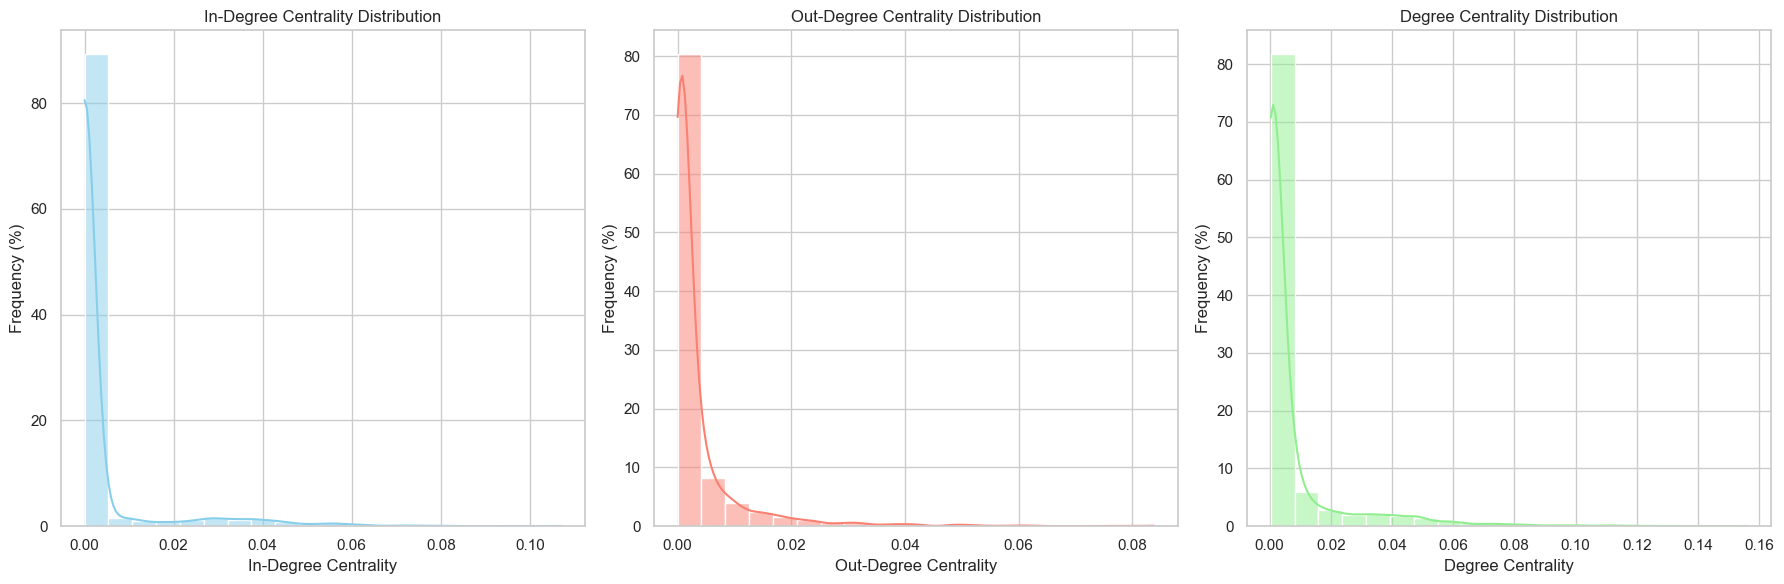

In [20]:
# Create the 'plots' directory if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

# Set up the plot figure
plt.figure(figsize=(18, 6))

# Plot the distribution of in-degree centrality (percentages)
plt.subplot(1, 3, 1)
sns.histplot(list(in_degree_centrality.values()), kde=True, bins=20, color='skyblue', stat='percent')
plt.title("In-Degree Centrality Distribution")
plt.xlabel("In-Degree Centrality")
plt.ylabel("Frequency (%)")

# Plot the distribution of out-degree centrality (percentages)
plt.subplot(1, 3, 2)
sns.histplot(list(out_degree_centrality.values()), kde=True, bins=20, color='salmon', stat='percent')
plt.title("Out-Degree Centrality Distribution")
plt.xlabel("Out-Degree Centrality")
plt.ylabel("Frequency (%)")

# Plot the distribution of degree centrality (percentages)
plt.subplot(1, 3, 3)
sns.histplot(list(degree_centrality.values()), kde=True, bins=20, color='lightgreen', stat='percent')
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency (%)")

# Adjust the layout
plt.tight_layout()

# Save the plot to the 'plots' folder
plt.savefig('plots/centrality_distributions_percentage.png')


# Adjust the layout
plt.tight_layout()
plt.show()


### Betweeness Centrality

Betweenness centrality measures how often a node appears on the shortest path between other nodes. A high betweenness centrality indicates that the node acts as a bridge in the network - **it may not be a hub**.

In [21]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Sort nodes by betweenness centrality in descending order
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 hubs by betweenness centrality
print("Top 10 hubs by betweenness centrality:")
for node, centrality in sorted_betweenness_centrality[:10]:
    print(f"Node {node}: Betweenness Centrality = {centrality:.4f}")


Top 10 hubs by betweenness centrality:
Node HJ Mitchell: Betweenness Centrality = 0.0087
Node Boing! said Zebedee: Betweenness Centrality = 0.0080
Node Secret: Betweenness Centrality = 0.0077
Node Ktr101: Betweenness Centrality = 0.0071
Node Mkativerata: Betweenness Centrality = 0.0050
Node SarekOfVulcan: Betweenness Centrality = 0.0049
Node 28bytes: Betweenness Centrality = 0.0048
Node Fetchcomms: Betweenness Centrality = 0.0046
Node Lord Roem: Betweenness Centrality = 0.0044
Node Ironholds: Betweenness Centrality = 0.0042


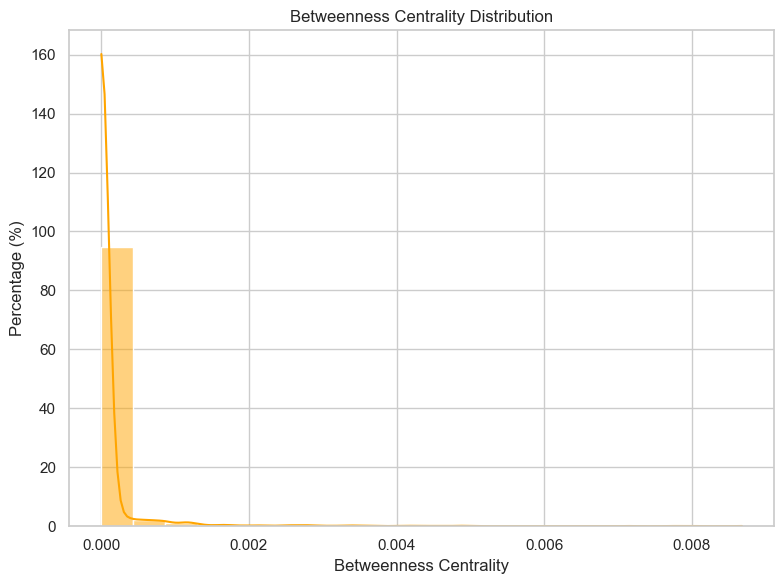

In [22]:
# Set up the plot for betweenness centrality
plt.figure(figsize=(8, 6))

# Plot the distribution of betweenness centrality (percentages)
sns.histplot(list(betweenness_centrality.values()), kde=True, bins=20, color='orange', stat='percent')
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Percentage (%)")

# Save the plot to the 'plots' folder
plt.tight_layout()
plt.savefig('plots/betweenness_centrality_distribution_percentage.png')

# Adjust the layout
plt.tight_layout()
plt.show()

### Eigenvector Centrality

Eigenvector centrality is based on the idea that a node's importance is determined not only by its degree but also by the importance of the nodes it is connected to. High eigenvector centrality nodes are well-connected to other important nodes.

In [23]:
# its not implementable in multigraphs

# putting it in a simple network would lose too much information


### Closeness Centrality

Closeness centrality measures how close a node is to all other nodes in the network. A node with high closeness centrality is able to reach other nodes in fewer steps.



In [24]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Sort nodes by closeness centrality in descending order
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 hubs by closeness centrality
print("Top 10 hubs by closeness centrality:")
for node, centrality in sorted_closeness_centrality[:10]:
    print(f"Node {node}: Closeness Centrality = {centrality:.4f}")


Top 10 hubs by closeness centrality:
Node SarahStierch: Closeness Centrality = 0.3804
Node HJ Mitchell: Closeness Centrality = 0.3782
Node Berean Hunter: Closeness Centrality = 0.3748
Node Lord Roem: Closeness Centrality = 0.3745
Node Ironholds: Closeness Centrality = 0.3736
Node Secret: Closeness Centrality = 0.3729
Node My76Strat: Closeness Centrality = 0.3697
Node SarekOfVulcan: Closeness Centrality = 0.3695
Node The Thing That Should Not Be: Closeness Centrality = 0.3671
Node Σ: Closeness Centrality = 0.3649


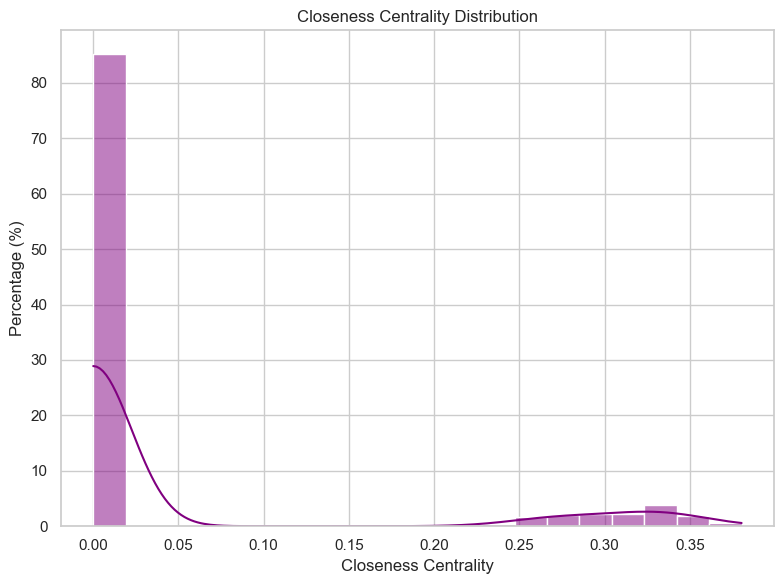

In [25]:
# Set up the plot for closeness centrality
plt.figure(figsize=(8, 6))

# Plot the distribution of closeness centrality (percentages)
sns.histplot(list(closeness_centrality.values()), kde=True, bins=20, color='purple', stat='percent')
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Percentage (%)")

# Save the plot to the 'plots' folder
plt.tight_layout()
plt.savefig('plots/closeness_centrality_distribution_percentage.png')

# Adjust the layout

plt.show()

### Random Failure vs Targeted Attacks through Centrality

- Random Failure: Nodes are removed randomly from the network, simulating random errors or failures.
- Targeted Attacks (Centrality): Nodes are removed based on their centrality (importance in the network), simulating deliberate attacks aimed at the most crucial nodes.


Precomputing centrality values improves efficiency by calculating them once, rather than recalculating for each node removal. This speeds up the simulation and ensures nodes are removed in a consistent, logical order based on their importance.

The results might be suboptimal but still have some similarity to the recompunting apon each removal

Simulating random failure...
Running attack for Degree centrality...
Running attack for Betweenness centrality...
Running attack for Closeness centrality...
Running attack for In-Degree centrality...
Running attack for Out-Degree centrality...


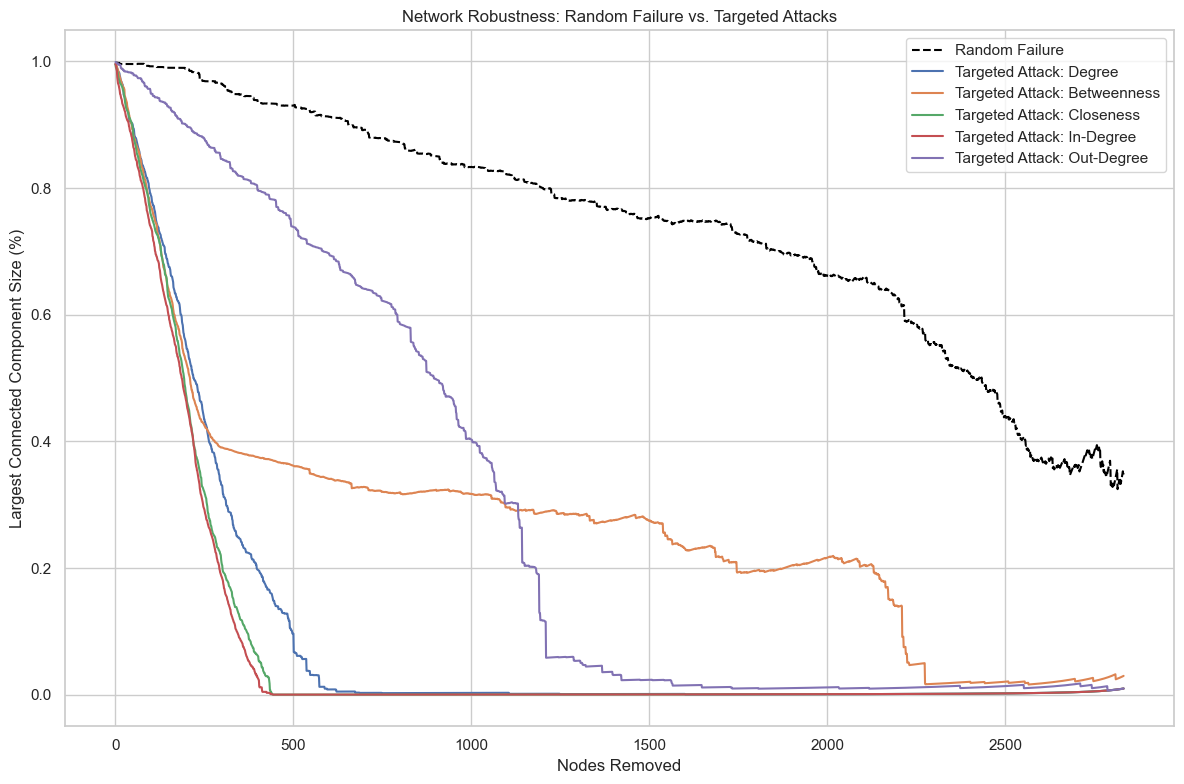

In [26]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns

def largest_connected_component_size(G):
    """
    Returns the size of the largest connected component in the graph (as a fraction of the total nodes).
    For a directed graph, we use weakly connected components.
    """
    if G.is_directed():
        connected_components = nx.weakly_connected_components(G)
    else:
        connected_components = nx.connected_components(G)
    
    largest_cc = max(connected_components, key=len)
    return len(largest_cc) / len(G.nodes)

def simulate_random_failure(G, target_size):
    """
    Simulates random failure by removing nodes randomly and records the largest connected component size.
    """
    G_copy = G.copy()
    sizes = []
    
    # Efficient random failure: shuffle the nodes and remove them one by one
    nodes_to_remove = list(G_copy.nodes)
    random.shuffle(nodes_to_remove)
    
    # Only perform one random failure simulation
    for node in nodes_to_remove:
        G_copy.remove_node(node)
        sizes.append(largest_connected_component_size(G_copy))
        if len(G_copy.nodes) <= target_size:
            break
    
    return sizes

def simulate_targeted_attack(G, centrality_function, target_size):
    """
    Simulates targeted attack by removing the most central nodes first.
    """
    G_copy = G.copy()
    sizes = []
    
    # Precompute centrality values once
    centrality = centrality_function(G_copy)
    
    # Sort nodes by centrality (highest to lowest)
    sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    nodes_to_remove = [node for node, _ in sorted_nodes]
    
    for node in nodes_to_remove:
        G_copy.remove_node(node)
        sizes.append(largest_connected_component_size(G_copy))
        if len(G_copy.nodes) <= target_size:
            break
    
    return sizes

def plot_robustness_comparison(random_result, targeted_results, labels):
    # Set Seaborn style
    
    
    # Create a figure with seaborn
    plt.figure(figsize=(12, 8))

    # Plot random result (single plot)
    plt.plot(range(len(random_result)), random_result, label="Random Failure", linestyle="--", color="black")
    
    # Plot targeted attack results
    for result, label in zip(targeted_results, labels):
        plt.plot(range(len(result)), result, label=f"Targeted Attack: {label}")
    
    # Add labels, title, and legend
    plt.title("Network Robustness: Random Failure vs. Targeted Attacks")
    plt.xlabel("Nodes Removed")
    plt.ylabel("Largest Connected Component Size (%)")
    plt.legend()

    # Display plot with tight layout
    plt.tight_layout()
    plt.savefig('plots/NetworkRobustness_RandomVSTargeted.png')
    plt.show()

# Set the target number of nodes (e.g., stop when there are fewer than 100 nodes)
target_size = 100

# Centrality functions to be used in targeted attacks
centrality_functions = [
    ('Degree', nx.degree_centrality),
    ('Betweenness', nx.betweenness_centrality),
    ('Closeness', nx.closeness_centrality),
    ('In-Degree', nx.in_degree_centrality),
    ('Out-Degree', nx.out_degree_centrality)
]

random_results = []
targeted_results = []

# Run the attack simulations for each centrality
print("Simulating random failure...")
random_result = simulate_random_failure(G, target_size)
random_results.append(random_result)

# Run the targeted attacks
for label, centrality_function in centrality_functions:
    print(f"Running attack for {label} centrality...")
    
    # Simulate targeted attack
    targeted_result = simulate_targeted_attack(G, centrality_function, target_size)
    targeted_results.append(targeted_result)

# Plot the results using seaborn
plot_robustness_comparison(random_result, targeted_results, [label for label, _ in centrality_functions])


### Partitions and Communities in Network Analysis

### Partitions

A **partition** is a way of dividing the nodes in a network into non-overlapping subsets or groups. Each subset in the partition represents a collection of nodes that are grouped based on certain criteria, often based on their connectivity or other network characteristics.

- **Non-overlapping partition**: Each node belongs to exactly one group.
- **Overlapping partition**: A node can belong to more than one group.

The goal of partitioning is to **minimise the number of edges between different partitions** (or to maximise the edges within the same partition), which indicates that nodes within the same partition are more strongly connected than nodes in different partitions.

#### Types of Partitions:

- **Modular Partitioning**: A method of dividing the network to maximise the number of edges within each group, often evaluated by modularity.
- **Spectral Partitioning**: Uses eigenvalues of the graph's Laplacian matrix to divide the network into partitions.
- **Hierarchical Partitioning**: Successively splits the network into smaller partitions (or clusters), creating a hierarchical tree structure.

### Communities

A **community** is a subset of nodes within a network that is **more densely connected to each other** than to the rest of the network. Communities in networks often reflect **functional, social, or organizational groupings**.

#### Characteristics of Communities:

- **Dense internal connections**: Nodes within the same community are tightly interconnected. (high cohesion)
- **Sparse external connections**: Communities are loosely connected to nodes outside their community. (high seperation)
- **Overlap (for overlapping communities)**: Some nodes might belong to multiple communities, especially in complex networks where individuals (nodes) have more than one role or association.


#### Key Similaraty Concepts to Partitions and Communities

1. **Modularity**: 
   - Modularity is a measure used to evaluate the quality of a partition or community structure. It quantifies the density of edges within communities compared to edges between communities. Higher modularity values indicate a better community structure, where nodes in the same community are more connected than nodes in different communities.

2. **Homophily**: 
   - The principle that similar nodes (e.g., nodes with similar attributes) are more likely to be connected. This often drives the formation of communities.

3. **Edge Density**:
   - The number of edges within a community compared to the total possible number of edges. Higher edge density suggests stronger internal connections within the community.

4. **Cliques**:
   - A clique is a subset of nodes in which every pair of nodes is connected by an edge. A clique can be seen as a very tightly knit community where every node is directly connected to every other node.



#### Community Detection in Social Networks

In **social networks**, community detection is crucial for understanding how individuals or groups interact, form relationships, or share common interests. Social networks are often complex and dynamic, with overlapping communities that evolve over time. Identifying these communities can help uncover hidden structures in social systems and offer insights into user behavior, group dynamics, and influence patterns.

#### Recommended Approach for Social Networks:

1. **Louvain Algorithm - Non-overlapping communities**:
- It's widely used for community detection in social networks. It maximizes the **modularity** of the network, which helps identify dense clusters of nodes that are highly connected internally but sparsely connected to other clusters. This method is efficient and scalable, making it a good choice for large social networks.


2. **BigClam - Overllaping communities**:
- Social networks often have overlapping communities, where individuals belong to multiple groups (e.g., professional, social, hobby-based). The **BigClam algorithm** is particularly effective for detecting overlapping communities, making it suitable for social networks with complex relationships.





### Louvain Algorithm HIerarchical- multiple iterations for optimised results

NOT OPTIMAL ANSWERS 

The **Louvain Community Detection Algorithm** is a simple method used to extract the community structure of a network. It is a heuristic method based on **modularity optimization**.

The algorithm works in two steps:

#### Step 1: Assigning Nodes to Communities

In the first step, every node is assigned to its own community. Then, for each node, the algorithm tries to find the maximum positive modularity gain by moving each node to one of its neighbor communities. If no positive gain is achieved, the node remains in its original community.

The modularity gain obtained by moving an isolated node into a community can be easily calculated by the following formula:

$$
\Delta Q = \frac{e_{\text{in}}}{2m} - \left( \frac{k_i}{2m} \right) \cdot \left( \frac{k_j}{2m} \right)
$$

Where:
- $ e_{\text{in}} $ is the sum of the weights of the links between node $ i $ and the nodes in community $ C_j $,
- $ k_i $ is the sum of the weights of the links incident to node $ i $,
- $ k_j $ is the sum of the weights of the links incident to community $ C_j $,
- $ m $ is the size of the graph,
- $ C_j $ is the community to which node $ i $ is trying to move.

##### Directed Case Modularity Gain

For directed graphs, the modularity gain can be computed using the following formula:

$$
\Delta Q = \frac{e_{\text{in}}^{\text{in}}}{2m} - \left( \frac{k_{\text{in}}}{2m} \right) \cdot \left( \frac{k_{\text{out}}}{2m} \right)
$$

Where:
- $ e_{\text{in}}^{\text{in}}$ is the inner weighted degree of node $ i $,
- $ k_{\text{in}} $ is the sum of in-going links incident to node $ i $,
- $ k_{\text{out}} $ is the sum of out-going links incident to node $ i $,
- $ m $ is the size of the graph.

#### Step 2: Building a New Network

In the second phase, a new network is built where the nodes are the communities found in the first phase. The weights of the links between the new nodes are given by the sum of the weights of the links between nodes in the corresponding two communities. Once this phase is complete, the first phase can be re-applied, creating larger communities with increased modularity.

#### Termination

The above two phases are executed iteratively until no modularity gain is achieved (or the gain is less than a threshold, or the maximum number of levels is reached).

#### Self-loops

Be careful with **self-loops** in the input graph. These are treated as if the process had already started in the middle of the algorithm. Large self-loop edge weights represent strong communities, making it difficult to add other nodes. If your input graph's self-loop edge weights do not represent already reduced communities, you may want to remove the self-loops before inputting the graph.


In [27]:
import networkx as nx
from networkx.algorithms.community import louvain_communities
from collections import Counter
from networkx.algorithms.community import modularity, partition_quality


def louvain_community_detection_directed(G, iterations=50):
    """
    Perform community detection using the Louvain method on a directed graph by collapsing directed edges into undirected edges 
    for the purpose of community detection. The graph remains directed for further analysis.

    Parameters:
        G (nx.MultiDiGraph): The input directed graph.
        iterations (int): The number of iterations to perform for detecting the best community partition.

    Returns:
        best_partition (dict): A dictionary where keys are node IDs and values are community IDs.
        best_modularity (float): The highest modularity value from the iterations.
        community_sizes (Counter): Sizes of communities in the best partition.
        coverage (float): Coverage score of the partitioning.
        performance (float): Performance score of the partitioning.
        conductance_score (float): Conductance score of the partitioning.
    """
    best_partition = None
    best_modularity = -1  # Start with a low modularity value
    best_partition_dict = None  # Store the partition dictionary

    # Convert directed graph to an undirected graph for community detection
    simple_G = nx.DiGraph()  # Use an undirected graph here
    for u, v in G.edges():
        simple_G.add_edge(u, v)  # Collapse directed edges into undirected edges
    
    # Perform multiple iterations to find the partition with the highest modularity
    for _ in range(iterations):
        # Apply Louvain method for community detection using NetworkX
        communities = list(louvain_communities(simple_G))
        
        # Create a partition mapping: node -> community ID
        partition = {}
        for community_id, community in enumerate(communities):
            for node in community:
                partition[node] = community_id
        
        # Calculate modularity for the partition
        modularity_score = modularity(simple_G, communities)
        
        # Calculate coverage and performance
        coverage, performance = partition_quality(simple_G, communities)
        
        # Calculate conductance for each pair of communities (here we will use the first two communities)
        if len(communities) > 1:
            conductance_score = nx.conductance(simple_G, communities[0], communities[1])
        else:
            conductance_score = 0  # If there is only one community, the conductance is 0
        
        # Check if the current modularity is better
        if modularity_score > best_modularity:
            best_modularity = modularity_score
            best_partition_dict = partition

    # Create a Counter for community sizes in the best partition
    community_sizes = Counter(best_partition_dict.values())

    return best_partition_dict, best_modularity, community_sizes, coverage, performance, conductance_score


# Example of applying the function on your MultiDiGraph G
partition, modularity, community_sizes, coverage, performance, conductance_score = louvain_community_detection_directed(G)

print("Best Modularity:", modularity)
print(f"Community sizes: {community_sizes}")
print(f"Coverage: {coverage:.4f}")
print(f"Performance: {performance:.4f}")
print(f"Conductance: {conductance_score:.4f}")


Best Modularity: 0.32463936475147304
Community sizes: Counter({1: 894, 0: 710, 2: 671, 3: 659})
Coverage: 0.5745
Performance: 0.7481
Conductance: 0.3734


In [29]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import modularity, partition_quality
from collections import Counter

def detect_and_measure_communities(G, iterations=10):
    """
    Detect communities using naive greedy modularity maximisation over multiple iterations,
    and evaluate the partition quality.

    Parameters:
        G (nx.MultiDiGraph): Input graph.
        iterations (int): Number of iterations to perform for detecting the best community partition.

    Returns:
        best_partition (dict): A dictionary where keys are node IDs and values are community IDs.
        best_modularity (float): The highest modularity value from the iterations.
        community_sizes (Counter): Sizes of the communities in the best partition.
        coverage (float): Coverage score of the best partitioning.
        performance (float): Performance score of the best partitioning.
        best_conductance (float): Conductance score of the best partitioning.
    """
    best_modularity = -1  # Start with a low modularity value
    best_partition = None
    best_community_sizes = None
    best_coverage = None
    best_performance = None
    best_conductance = None
    
    # Convert MultiDiGraph to a simple undirected graph (no weights)
    simple_G = nx.DiGraph()
    for u, v in G.edges():
        simple_G.add_edge(u, v)  # No weight handling

    # Perform multiple iterations to find the best partition based on modularity
    for _ in range(iterations):
        # Detect communities using greedy modularity maximisation
        communities = list(greedy_modularity_communities(simple_G))
        
        # Convert communities into a partition (list of sets of nodes)
        partition = [set(community) for community in communities]
        
        # Compute modularity
        modularity_score = modularity(simple_G, partition)
        
        # Compute coverage and performance
        coverage, performance = partition_quality(simple_G, partition)
        
        # Compute conductance for the first two communities (if available)
        if len(communities) > 1:
            conductance_score = nx.conductance(simple_G, communities[0], communities[1])
        else:
            conductance_score = 0  # If there is only one community, conductance is 0
        
        # Update the best partition based on modularity
        if modularity_score > best_modularity:
            best_modularity = modularity_score
            
            # Create a dictionary mapping node -> community
            best_partition = {}
            for community_id, community in enumerate(communities):
                for node in community:
                    best_partition[node] = community_id

            # Track the community sizes (same format as Louvain output)
            best_community_sizes = Counter(best_partition.values())
            
            # Update other metrics
            best_coverage = coverage
            best_performance = performance
            best_conductance = conductance_score

    # Return the best partition, modularity, community sizes, coverage, performance, and conductance
    return best_partition, best_modularity, best_community_sizes, best_coverage, best_performance, best_conductance


# Example of applying the function on your MultiDiGraph G
best_partition, best_modularity, best_community_sizes, best_coverage, best_performance, best_conductance = detect_and_measure_communities(G)

# Print results
print(f"Best Modularity: {best_modularity:.4f}")
print(f"Community sizes: {best_community_sizes}")
print(f"Coverage: {best_coverage:.4f}")
print(f"Performance: {best_performance:.4f}")
print(f"Conductance: {best_conductance:.4f}")


Best Modularity: 0.3046
Community sizes: Counter({0: 1244, 1: 1151, 2: 529, 3: 6, 4: 4})
Coverage: 0.6842
Performance: 0.6353
Conductance: 0.3397


### Coverage, Performance, and Conductance in Community Detection

#### 1. **Coverage**
   - **Definition**: Coverage measures the fraction of edges that are within communities, compared to the total number of edges in the graph.
   - **Interpretation**: A higher coverage indicates that the communities identified by the algorithm are tightly connected internally, meaning most edges are within the same community.
   - **Formula**:
     $$
     \text{Coverage} = \frac{\text{Number of edges within communities}}{\text{Total number of edges in the graph}}
     $$

#### 2. **Performance**
   - **Definition**: Performance measures the number of edges between communities. It reflects how well the community detection algorithm has separated different communities.
   - **Interpretation**: A higher performance means that fewer edges cross between communities, indicating clear separation between the communities.
   - **Formula**:
     $$
     \text{Performance} = \frac{\text{Number of edges between different communities}}{\text{Total number of edges in the graph}}
     $$

#### 3. **Conductance**
   - **Definition**: Conductance measures the fraction of the total edge weight that crosses the boundary of a community, relative to the total edge weight of that community.
   - **Interpretation**: A lower conductance means that the community is well-defined, with fewer connections to nodes outside the community. High conductance indicates that a community has many edges leading outside, suggesting weak community structure.
   - **Formula**:
     $$
     \text{Conductance}(C) = \frac{\text{Weight of edges from community } C \text{ to outside}}{\text{Total edge weight in community } C}
     $$


### Text Analysis

In [120]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


stop_words = set(stopwords.words('english') + ['support', 'oppose', 'user', 'admin', 'candidate', 'wikipedia', 'color',
                                              'http', 'php', 'org', 'luck', 'font', 'see', 'green', 'would', 'e', 'span', 'style', 'border', '1px', 'index' ])

# Function to get text in desired lowercase form
def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()

# Function for different forms of tokeniztion (all 3 forms tested for performace)
def tokenize(words, modulation):
    tokens = re.split(r'\W+', words)
    stems = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        lowers=abbr_or_lower(token)
        if lowers not in stop_words:
            if re.search('[a-zA-Z]', lowers):
                if modulation==1:
                    stems.append(porter.stem(lowers))
                if modulation==2:
                    stems.append(lmtzr.lemmatize(lowers))
                if modulation==0:
                    stems.append(lowers)
    return stems

# Ensure that the 'text' is in string format and handle NaN values by replacing them with an empty string
text = df['TXT'].fillna('').astype(str)  # Fill NaNs with empty string and convert to string

# Apply Pre-Processing and Tokenization
comments = [tokenize(comment, 2) for comment in text]  # Modulation = 2 for lemmatization

# Now you can proceed with TF-IDF Vectorization
tfidf1 = TfidfVectorizer(ngram_range=(1, 1), tokenizer=lambda doc: doc, lowercase=False)  # Unigrams
tfidf2 = TfidfVectorizer(ngram_range=(2, 2), tokenizer=lambda doc: doc, lowercase=False)  # Bigrams
tfidf3 = TfidfVectorizer(ngram_range=(3, 3), tokenizer=lambda doc: doc, lowercase=False)  # Trigrams

# Unigrams
com_uni = tfidf1.fit_transform(comments)

# Convert the results into a DataFrame for better readability
uni_df = pd.DataFrame.sparse.from_spmatrix(com_uni, columns=tfidf1.get_feature_names_out())
uni_df = uni_df.sum(axis=0)  # Sum across all documents (rows)
uni_df = uni_df.sort_values(axis=0, ascending=False)  # Sort by frequency
print("Top 10 Unigrams:")
print(uni_df.head(10))

# Bigrams
com_bi = tfidf2.fit_transform(comments)

bi_df = pd.DataFrame.sparse.from_spmatrix(com_bi, columns=tfidf2.get_feature_names_out())
bi_df = bi_df.sum(axis=0)
bi_df = bi_df.sort_values(axis=0, ascending=False)
print("\nTop 10 Bigrams:")
print(bi_df.head(10))

# Trigrams
com_tri = tfidf3.fit_transform(comments)

tri_df = pd.DataFrame.sparse.from_spmatrix(com_tri, columns=tfidf3.get_feature_names_out())
tri_df = tri_df.sum(axis=0)
tri_df = tri_df.sort_values(axis=0, ascending=False)
print("\nTop 10 Trigrams:")
print(tri_df.head(10))



Top 10 Unigrams:
good          1073.081589
per            677.712564
concern        643.912594
editor         588.592345
tool           541.886889
reason          530.07203
work           495.511651
answer         463.043675
experience      460.96829
look           431.111445
dtype: Sparse[float64, 0]

Top 10 Bigrams:
look good          196.817324
answer question    165.893146
net positive       129.589382
abuse tool         119.972327
fully qualified     93.431954
en w                89.011067
w title             88.978765
reason think         87.13455
per nom             83.850131
good work           79.547143
dtype: Sparse[float64, 0]

Top 10 Trigrams:
en w title                  84.28748
wizardman wizardman sub    80.875272
think abuse tool            62.84481
reason think abuse          62.49746
family georgia size        52.250829
face comic sans            48.215813
comic sans MS              47.572285
good answer question        39.38413
king heart king            38.051325
tex

#### Text Analysis - Vot = -1

In [117]:
df


,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''''' per noms. BDD is a strong contributor w...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''''', with great pleasure. I work with BDD a..."
...,...,...,...,...,...,...,...
30247,Smithers7,ZooPro,-1,-1,2010,2010-02-22 16:06:00,'''[[User:Smithers7/RfA|]]''' - ZooPro mention...
30248,SilkTork,ZooPro,-1,-1,2010,2010-02-22 17:18:00,"'''''' because of the concerns already raised,..."
30249,GlassCobra,ZooPro,-1,-1,2010,2010-02-22 18:14:00,'''''' per Tanthalas and SilkTork.
30250,Atama,ZooPro,-1,-1,2010,2010-02-22 18:17:00,"'''''' - Per Polargeo, and per [http://en.wiki..."


In [122]:
# Ensure that the 'text' is in string format and handle NaN values by replacing them with an empty string
text = df['TXT'].fillna('').astype(str)  # Fill NaNs with empty string and convert to string

# Separate rows where VOT is 1
df_vot_1 = df[df['VOT'] == 1]

# Apply Pre-Processing and Tokenization for VOT = 1
comments_vot_1 = [tokenize(comment, 2) for comment in df_vot_1['TXT'].fillna('').astype(str)]  # Modulation = 2 for lemmatization

# Instantiate TF-IDF Vectorizers
tfidf1 = TfidfVectorizer(ngram_range=(1, 1), tokenizer=lambda doc: doc, lowercase=False)  # Unigrams
tfidf2 = TfidfVectorizer(ngram_range=(2, 2), tokenizer=lambda doc: doc, lowercase=False)  # Bigrams
tfidf3 = TfidfVectorizer(ngram_range=(3, 3), tokenizer=lambda doc: doc, lowercase=False)  # Trigrams

# TF-IDF for VOT = 1 (Unigrams)
com_uni_vot_1 = tfidf1.fit_transform(comments_vot_1)

# Convert the results into a DataFrame for better readability
uni_df_vot_1 = pd.DataFrame.sparse.from_spmatrix(com_uni_vot_1, columns=tfidf1.get_feature_names_out())
uni_df_vot_1 = uni_df_vot_1.sum(axis=0)  # Sum across all documents (rows)
uni_df_vot_1 = uni_df_vot_1.sort_values(axis=0, ascending=False)  # Sort by frequency
print("Top 10 Unigrams for VOT = 1:")
print(uni_df_vot_1.head(10))

# TF-IDF for VOT = 1 (Bigrams)
com_bi_vot_1 = tfidf2.fit_transform(comments_vot_1)
bi_df_vot_1 = pd.DataFrame.sparse.from_spmatrix(com_bi_vot_1, columns=tfidf2.get_feature_names_out())
bi_df_vot_1 = bi_df_vot_1.sum(axis=0)
bi_df_vot_1 = bi_df_vot_1.sort_values(axis=0, ascending=False)
print("\nTop 10 Bigrams for VOT = 1:")
print(bi_df_vot_1.head(10))

# TF-IDF for VOT = 1 (Trigrams)
com_tri_vot_1 = tfidf3.fit_transform(comments_vot_1)
tri_df_vot_1 = pd.DataFrame.sparse.from_spmatrix(com_tri_vot_1, columns=tfidf3.get_feature_names_out())
tri_df_vot_1 = tri_df_vot_1.sum(axis=0)
tri_df_vot_1 = tri_df_vot_1.sort_values(axis=0, ascending=False)
print("\nTop 10 Trigrams for VOT = 1:")
print(tri_df_vot_1.head(10))

Top 10 Unigrams for VOT = 1:
good       940.962937
concern    493.400174
editor     476.937421
reason     467.913914
tool       446.944922
per        404.138276
look       390.848795
great      383.770804
work       380.768012
seems      337.446804
dtype: Sparse[float64, 0]

Top 10 Bigrams for VOT = 1:
look good            193.320975
answer question      125.385094
net positive         125.360976
abuse tool            115.43922
fully qualified       92.879319
reason think          85.855374
per nom               81.768437
good answer           71.545769
good contribution     69.746371
good work             68.331263
dtype: Sparse[float64, 0]

Top 10 Trigrams for VOT = 1:
wizardman wizardman sub    75.387432
think abuse tool           62.500134
reason think abuse         62.253458
family georgia size        43.716406
good answer question       38.305014
king heart king            36.748945
face comic sans            36.489219
comic sans MS                36.2407
en w title              

In [123]:
# Separate rows where VOT is -1
df_vot_neg_1 = df[df['VOT'] == -1]

# Apply Pre-Processing and Tokenization for VOT = -1
comments_vot_neg_1 = [tokenize(comment, 2) for comment in df_vot_neg_1['TXT'].fillna('').astype(str)]  # Modulation = 2 for lemmatization

# TF-IDF for VOT = -1 (Unigrams)
com_uni_vot_neg_1 = tfidf1.fit_transform(comments_vot_neg_1)

# Convert the results into a DataFrame for better readability
uni_df_vot_neg_1 = pd.DataFrame.sparse.from_spmatrix(com_uni_vot_neg_1, columns=tfidf1.get_feature_names_out())
uni_df_vot_neg_1 = uni_df_vot_neg_1.sum(axis=0)  # Sum across all documents (rows)
uni_df_vot_neg_1 = uni_df_vot_neg_1.sort_values(axis=0, ascending=False)  # Sort by frequency
print("\nTop 10 Unigrams for VOT = -1:")
print(uni_df_vot_neg_1.head(10))

# TF-IDF for VOT = -1 (Bigrams)
com_bi_vot_neg_1 = tfidf2.fit_transform(comments_vot_neg_1)
bi_df_vot_neg_1 = pd.DataFrame.sparse.from_spmatrix(com_bi_vot_neg_1, columns=tfidf2.get_feature_names_out())
bi_df_vot_neg_1 = bi_df_vot_neg_1.sum(axis=0)
bi_df_vot_neg_1 = bi_df_vot_neg_1.sort_values(axis=0, ascending=False)
print("\nTop 10 Bigrams for VOT = -1:")
print(bi_df_vot_neg_1.head(10))

# TF-IDF for VOT = -1 (Trigrams)
com_tri_vot_neg_1 = tfidf3.fit_transform(comments_vot_neg_1)
tri_df_vot_neg_1 = pd.DataFrame.sparse.from_spmatrix(com_tri_vot_neg_1, columns=tfidf3.get_feature_names_out())
tri_df_vot_neg_1 = tri_df_vot_neg_1.sum(axis=0)
tri_df_vot_neg_1 = tri_df_vot_neg_1.sort_values(axis=0, ascending=False)
print("\nTop 10 Trigrams for VOT = -1:")
print(tri_df_vot_neg_1.head(10))


Top 10 Unigrams for VOT = -1:
per           268.967753
experience    220.053508
concern       160.284403
WP            150.097464
answer          133.4174
edits         131.110098
sorry          124.82674
article        123.62526
question      123.546174
work          121.364705
dtype: Sparse[float64, 0]

Top 10 Bigrams for VOT = -1:
WP NOTNOW            58.911668
en w                 55.495846
w title              55.489467
answer question      47.855689
enough experience    34.408985
per WP               32.470113
118em 118em          31.101188
lack experience      27.107877
talk page            26.877485
diff oldid            26.79843
dtype: Sparse[float64, 0]

Top 10 Trigrams for VOT = -1:
en w title             52.735962
per WP NOTNOW          24.750914
diff prev oldid        24.532923
w title user_talk      17.380411
text shadow grey       16.473176
118em class texhtml    15.320992
shadow grey 118em      15.320992
118em 118em class      15.320992
118em 118em 118em      15.320992

In [135]:
# Filter rows where both 'NOTNOW' and 'WP' are found within the 'TXT' column
filtered_result = df[df['TXT'].str.contains('NOTNOW', case=False, na=False) & df['TXT'].str.contains('WP', case=False, na=False)]
filtered_result

,SRC,TGT,VOT,RES,YEA,DAT,TXT
2397,Ultraexactzz,angelo1345,-1,-1,2013,2013-04-09 13:09:00,''''''. I don't think the problem with your En...
2400,Jasper Deng,AppleJack-7,-1,-1,2013,2013-06-03 02:57:00,'''''' per [[WP:NOTNOW]]. Feel free to try aga...
3301,Tazerdadog,TortoiseWrath,1,-1,2013,2013-03-07 04:12:00,"'''Moral ''', while this is probably about to ..."
5056,Trevj,KTC,-1,1,2012,2012-12-21 14:38:00,'''''' (moved from ''neutral'') <del>per [[WP:...
6708,Rschen7754,987li,-1,-1,2012,2012-04-24 09:15:00,[[WP:NOTNOW]]. --'''
...,...,...,...,...,...,...,...
30109,Salvio giuliano,WikiCopter,-1,-1,2010,2010-09-13 10:30:00,"''''''. You're a very good editor, but I'm sor..."
30110,Chzz,WikiCopter,-1,-1,2010,2010-09-13 11:11:00,"''''''[[WP:NOTNOW]] <small><span style=""border..."
30233,Kudpung,Youndbuckerz,-1,-1,2010,2010-06-14 01:30:00,'''''' - I would suggest closure per [[WP:NOT...
30237,Mkativerata,Yuvmil,-1,-1,2010,2010-03-20 22:40:00,''''''. [[WP:NOTNOW]]. Only 43 edits is not en...


In [140]:
filtered_df = df[df['TGT'] == 'Neelix']

# Display the filtered rows
filtered_df


,SRC,TGT,VOT,RES,YEA,DAT,TXT
12654,Reaper Eternal,Neelix,1,1,2011,2011-02-24 20:40:00,'''''' - Very good article contributions!
12655,WereSpielChequers,Neelix,1,1,2011,2011-02-25 00:22:00,'''''' long term editor with even more edits t...
12656,Gimme danger,Neelix,1,1,2011,2011-02-25 00:41:00,'''''' Checks of a month of user and article t...
12657,Wizardman,Neelix,1,1,2011,2011-02-25 01:40:00,"Having 13 questions already? Sheesh, auto-supp..."
12658,Dank,Neelix,1,1,2011,2011-02-25 01:57:00,Mainly per WSC. - Dank (
...,...,...,...,...,...,...,...
12732,Ronk01,Neelix,-1,1,2011,2011-03-01 01:45:00,"'''''' Largely per Fastily. <s>Also, rather wo..."
12733,Mkativerata,Neelix,-1,1,2011,2011-03-01 20:21:00,"Concerned about ""If a user requested that I be..."
12734,John,Neelix,-1,1,2011,2011-03-02 18:50:00,'''Weak oppose''' per Fastily. With so little ...
12735,Alpha Quadrant,Neelix,-1,1,2011,2011-03-02 19:08:00,'''''' - Neelix appears to be very active in t...


## Predicting Edges